In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import Sequential 
from keras.datasets import mnist
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

2024-05-18 10:22:50.787914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 10:22:50.788012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 10:22:50.903298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


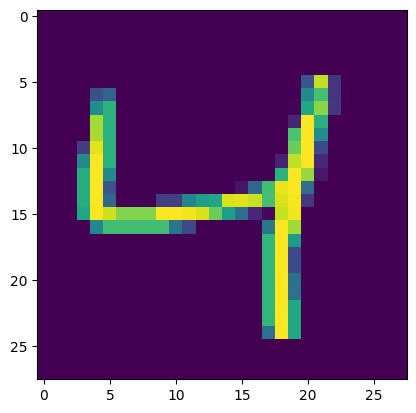

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])


# Data Visualization

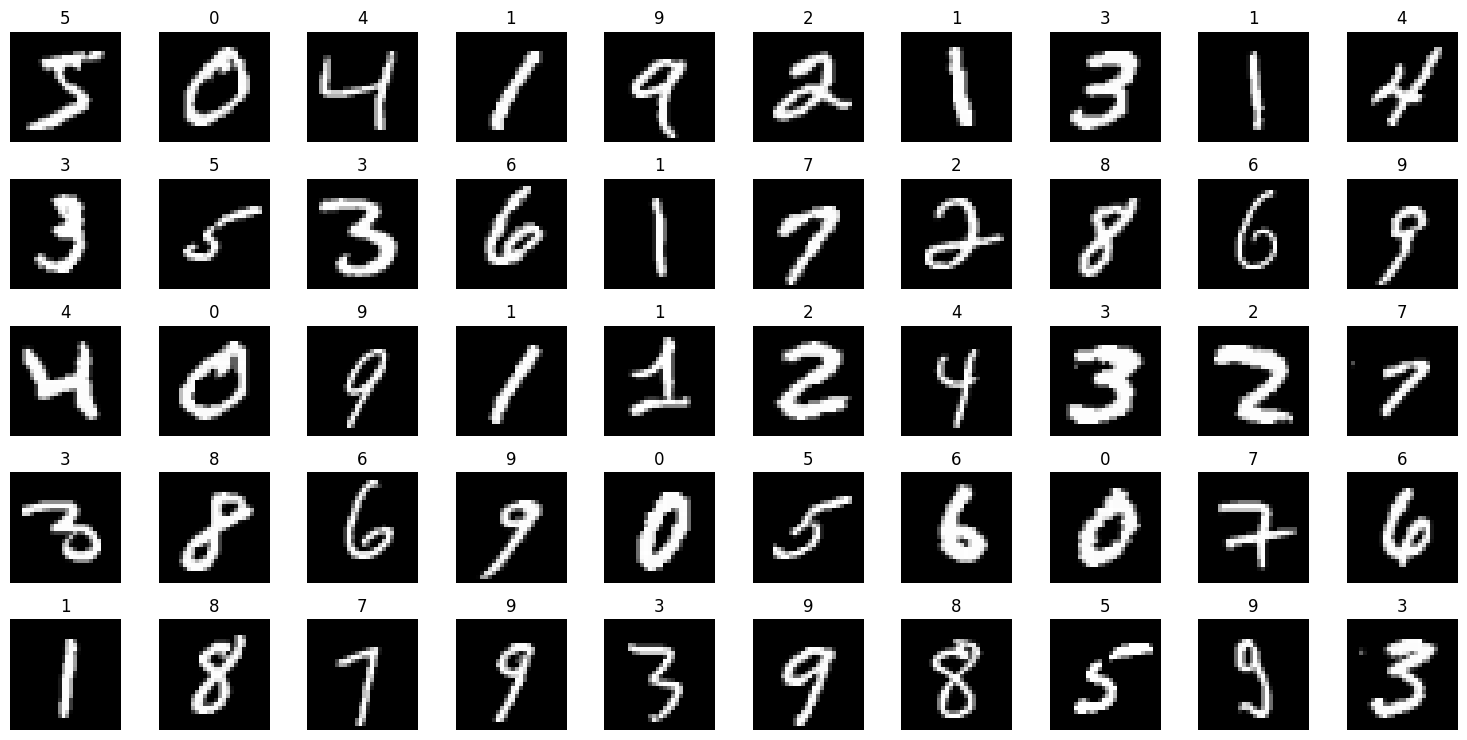

In [5]:
num_rows = 5
num_cols = 10
num_images = num_rows * num_cols

plt.figure(figsize=(num_cols * 1.5, num_rows * 1.5))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'{y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model=Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train=X_train.reshape((60000,28,28,1))
X_train=X_train.astype('float32')/255
X_test=X_test.reshape((10000,28,28,1))
X_test=X_test.astype('float32')/255
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=64)

test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"The test accuracy is",test_acc)

Epoch 1/20
 66/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1070 - loss: 2.3025

I0000 00:00:1716027790.432326      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716027790.451256      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1095 - loss: 2.3018
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1147 - loss: 2.3011
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1123 - loss: 2.3015
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1145 - loss: 2.3011
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1138 - loss: 2.3010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1133 - loss: 2.3009
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1121 - loss: 2.3013
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1117 - loss: 2.3013
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1123 - loss: 2.3012
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1121 - loss: 2.3012
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1127 - loss: 2.3013
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

# Use VGG16

In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.applications import VGG16

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to range [0, 1]

# Resize images to meet VGG16 input size requirement (32x32)
x_train_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_train])
x_test_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_test])

# Repeat single channel to create three channels
x_train_resized = np.repeat(x_train_resized[..., np.newaxis], 3, -1)
x_test_resized = np.repeat(x_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the pre-trained VGG16 base model
vgg16_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
vgg16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
vgg16_model.fit(x_train_resized, y_train, epochs=5,batch_size=64, validation_data=(x_test_resized, y_test))

# Evaluate the model
test_loss, vgg16_test_acc = vgg16_model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {vgg16_test_acc}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
 21/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2663 - loss: 2.1678

W0000 00:00:1716027850.448518      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7872 - loss: 0.7237

W0000 00:00:1716027861.048067      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716027862.336281      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7873 - loss: 0.7233 - val_accuracy: 0.9404 - val_loss: 0.1977
Epoch 2/5
 15/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9329 - loss: 0.2373

W0000 00:00:1716027865.780705      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9422 - loss: 0.1919 - val_accuracy: 0.9550 - val_loss: 0.1413
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9537 - loss: 0.1452 - val_accuracy: 0.9647 - val_loss: 0.1157
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9600 - loss: 0.1256 - val_accuracy: 0.9625 - val_loss: 0.1150
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9628 - loss: 0.1115 - val_accuracy: 0.9645 - val_loss: 0.1108
 28/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9737 - loss: 0.0956

W0000 00:00:1716027903.892459      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9595 - loss: 0.1246
Test accuracy: 0.9645000100135803


# Use ResNet50

In [11]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Add, Activation
from tensorflow.keras.applications import ResNet50

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to range [0, 1]

# Resize images to meet ResNet input size requirement (32x32)
x_train_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_train])
x_test_resized = np.array([np.pad(image, ((2, 2), (2, 2)), mode='constant') for image in x_test])

# Repeat single channel to create three channels
x_train_resized = np.repeat(x_train_resized[..., np.newaxis], 3, -1)
x_test_resized = np.repeat(x_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

# Create a new model by adding custom layers on top of the pre-trained ResNet50 base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
ResNet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
ResNet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
ResNet_model.fit(x_train_resized, y_train, epochs=5,batch_size=64, validation_data=(x_test_resized, y_test))

# Evaluate the model
test_loss, ResNet_test_acc = ResNet_model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {ResNet_test_acc}')

Epoch 1/5
  3/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.1675 - loss: 4.6930

W0000 00:00:1716027974.984034      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8398 - loss: 0.6169

W0000 00:00:1716028030.693665      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716028035.117285      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 126s 69ms/step - accuracy: 0.8399 - loss: 0.6165 - val_accuracy: 0.9593 - val_loss: 0.1777
Epoch 2/5
  5/938 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.9687 - loss: 0.0868

W0000 00:00:1716028039.890011      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9764 - loss: 0.0835 - val_accuracy: 0.9833 - val_loss: 0.0575
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9832 - loss: 0.0605 - val_accuracy: 0.9806 - val_loss: 0.0710
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9848 - loss: 0.0544 - val_accuracy: 0.9737 - val_loss: 0.1044
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9849 - loss: 0.0559 - val_accuracy: 0.9754 - val_loss: 0.0867
 16/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9861 - loss: 0.0554

W0000 00:00:1716028166.468858      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9705 - loss: 0.1032
Test accuracy: 0.9753999710083008


# Use MLP classifier 


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build MLP model
MLP_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons, ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for each digit), softmax activation
])

# Compile the model
MLP_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
MLP_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, MLP_test_acc = MLP_model.evaluate(x_test, y_test)
print(f'Test accuracy: {MLP_test_acc}')

Epoch 1/5
 94/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5862 - loss: 1.3948

W0000 00:00:1716028172.834309      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.5134

W0000 00:00:1716028175.286628      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716028175.895470      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8525 - loss: 0.5131 - val_accuracy: 0.9554 - val_loss: 0.1427
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9634 - loss: 0.1219 - val_accuracy: 0.9673 - val_loss: 0.1071
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9820 - loss: 0.0597 - val_accuracy: 0.9725 - val_loss: 0.0877
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0452 - val_accuracy: 0.9727 - val_loss: 0.0919
109/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.1002

W0000 00:00:1716028184.921938      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9703 - loss: 0.1029
Test accuracy: 0.9726999998092651


# Use SVM 


In [13]:
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = datasets.fetch_openml('mnist_784')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Scale features to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Initialize SVM classifier
clf = svm.SVC()

# Train SVM classifier
clf.fit(X_train, y_train)

# Predict on the test set
predicted = clf.predict(X_test)

# Print classification report
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))

# Print confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


Confusion matrix:
[[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 13

In [14]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
SVM_accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy of SVM : {SVM_accuracy}')

Accuracy of SVM : 0.9764285714285714


# Use DenseNet 

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, AveragePooling2D, Concatenate

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the DenseNet model
def dense_block(x, blocks, name):
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x

def conv_block(x, growth_rate, name):
    x1 = BatchNormalization(axis=3, epsilon=1.001e-5, name=name + '_0_bn')(x)
    x1 = tf.keras.layers.Activation('relu', name=name + '_0_relu')(x1)
    x1 = Conv2D(4 * growth_rate, 1, use_bias=False, name=name + '_1_conv')(x1)
    x1 = BatchNormalization(axis=3, epsilon=1.001e-5, name=name + '_1_bn')(x1)
    x1 = tf.keras.layers.Activation('relu', name=name + '_1_relu')(x1)
    x1 = Conv2D(growth_rate, 3, padding='same', use_bias=False, name=name + '_2_conv')(x1)
    x = Concatenate(axis=3, name=name + '_concat')([x, x1])
    return x

inputs = tf.keras.Input(shape=(28, 28, 1))
x = Conv2D(64, 7, strides=2, padding='same', use_bias=False, name='conv1_conv')(inputs)
x = BatchNormalization(axis=3, epsilon=1.001e-5, name='conv1_bn')(x)
x = tf.keras.layers.Activation('relu', name='conv1_relu')(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same', name='pool1')(x)

x = dense_block(x, 6, name='conv2')
x = tf.keras.layers.Activation('relu', name='relu2')(x)
x = tf.keras.layers.AveragePooling2D(2, strides=2, name='pool2')(x)

x = Flatten(name='flatten')(x)
outputs = Dense(10, activation='softmax', name='fc')(x)

# Create the model
DenseNet_model = Model(inputs, outputs, name='densenet')

# Compile the model
DenseNet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
DenseNet_model.fit(x_train, y_train, epochs=5,batch_size=64,validation_data=(x_test, y_test))

# Evaluate the model
test_loss, DenseNet_test_acc = DenseNet_model.evaluate(x_test, y_test)
print(f'Test accuracy: {DenseNet_test_acc}')

Epoch 1/5
 16/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3840 - loss: 2.1458

W0000 00:00:1716028650.931828      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9273 - loss: 0.2485

W0000 00:00:1716028664.480669      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716028666.071813      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9274 - loss: 0.2484 - val_accuracy: 0.9825 - val_loss: 0.0523
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9894 - val_loss: 0.0332
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9825 - val_loss: 0.0653
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9861 - val_loss: 0.0547
 66/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0612

W0000 00:00:1716028697.007830      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9835 - loss: 0.0641
Test accuracy: 0.9861000180244446


# Most accurate is DenseNet. So Confusion matrix of DenseNet
 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


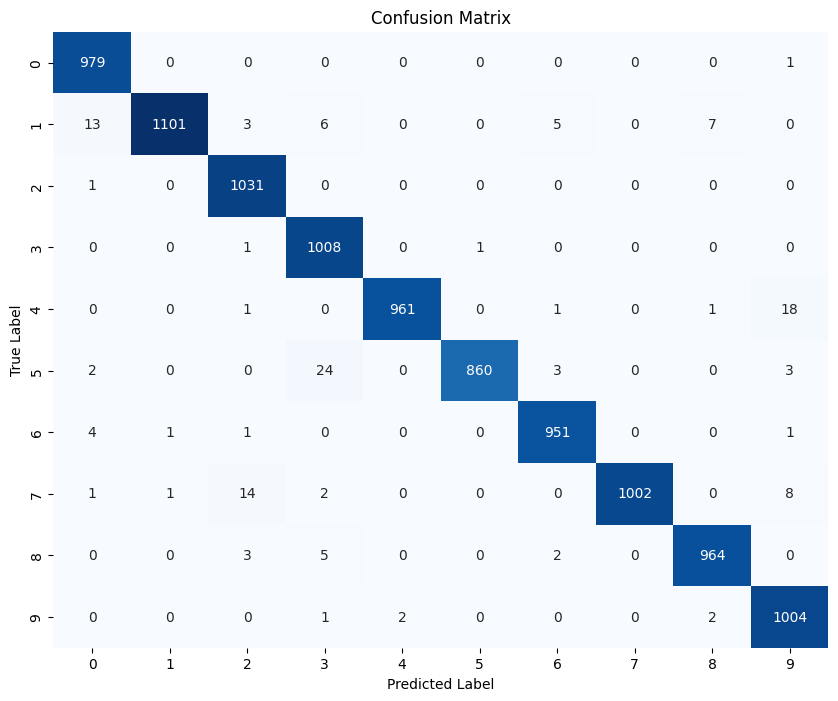

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = DenseNet_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

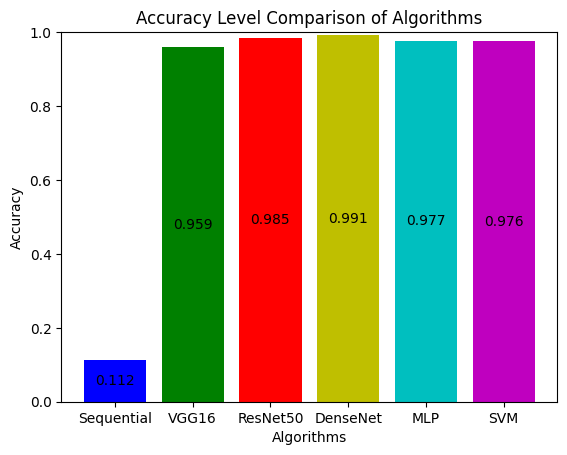

In [17]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Sequential', 'VGG16', 'ResNet50', 'DenseNet', 'MLP', 'SVM']
accuracy = [0.112, 0.959, 0.985, 0.991, 0.977, 0.976]

# Plotting the bar graph
fig, ax = plt.subplots()
bars = ax.bar(algorithms, accuracy, color=['b', 'g', 'r', 'y', 'c', 'm'])

# Annotating each bar with its accuracy value inside the bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{acc:.3f}', ha='center', va='center', color='black')

ax.set_ylim([0, 1])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Level Comparison of Algorithms')

plt.show()

In [18]:
from keras.models import load_model
DenseNet_model.save('hand_written_digit.h5')